Regression

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [69]:
data = pd.read_csv("/Users/xinyuyangren/Desktop/0100_hourlyall.csv")
data = data.dropna()
data['avg_wc_all'] = data['avg_wc_br2'] + data['avg_wc_br1_br3'] + data['avg_wc_lr']
data['avg_t_diff'] = (data['avg_t_lr'] + data['avg_t_br2'] + data['avg_t_br1_br3'])/3 - data['avg_t']
data['avg_co2_all'] = (data['avg_co2_br2'] + data['avg_co2_br1_br3'] + data['avg_co2_lr'])/3
data['avg_t_all'] = (data['avg_t_br2'] + data['avg_t_br1_br3'] + data['avg_t_lr'])/3


In [70]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
t = pd.DatetimeIndex(data['timestamp'])
month = t.month
data['Month'] = month
yr = t.year
data['Year'] = yr
data = data.set_index('timestamp')
data = data.resample('D', how='mean')
data = data.dropna()
data_Spring = data[(data.Month >= 3) & (data.Month <= 5)]
data_Spring['Season']='Spring'
data_Summer = data[(data.Month >= 6) & (data.Month <= 8)]
data_Summer['Season']='Summer'
data_Autumn = data[(data.Month >= 9) & (data.Month <= 11)]
data_Autumn['Season']='Autumn'
data_Winter_1 = data[(data.Month >= 12)]
data_Winter_2 = data[(data.Month <= 2)]      
data_Winter = pd.concat([data_Winter_1,data_Winter_2])
data_Winter['Season']='Winter'
data_seasons = pd.concat([data_Spring,data_Summer,data_Autumn,data_Winter])

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [71]:
for col in data:
    print col

avg_windspeed
avg_irradiation
avg_rh
avg_t
avg_wc_lr
avg_wc_br2
avg_wc_br1_br3
set_point_ventilation_unit
avg_t_lr
avg_t_br2
avg_t_br1_br3
avg_co2_lr
avg_co2_br2
avg_co2_br1_br3
gc
ecop
ecp
epop
epp
avg_wc_all
avg_t_diff
avg_co2_all
avg_t_all
Month
Year


(4, 14)

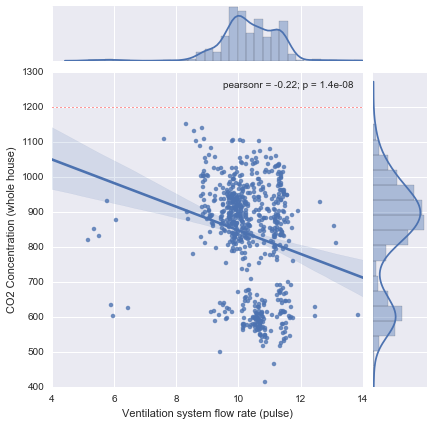

In [72]:
data1 = data[data.avg_co2_lr >= 400]
sns.jointplot(x="set_point_ventilation_unit", y="avg_co2_all", kind = 'reg', data=data)
plt.xlabel('Ventilation system flow rate (pulse)')
plt.ylabel('CO2 Concentration (whole house)')
plt.axhline(y=1200, linestyle = 'dotted',linewidth=0.8, c = 'r')
plt.ylim(400,1300)
plt.xlim(4,14)

(400, 1400)

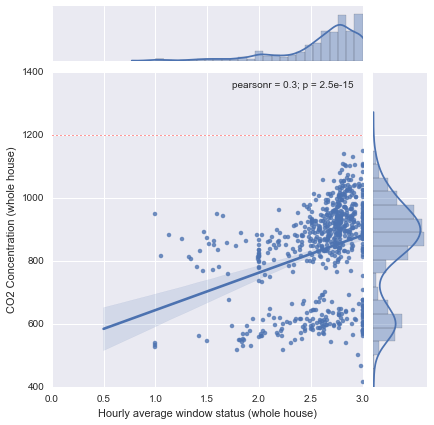

In [21]:
sns.jointplot(x="avg_wc_all", y="avg_co2_all", kind = 'reg', data=data)
plt.xlabel('Hourly average window status (whole house)')
plt.ylabel('CO2 Concentration (whole house)')
plt.axhline(y=1200, linestyle = 'dotted',linewidth=0.8, c = 'r')
plt.xlim(0,3)
plt.ylim(400,1400)

(400, 1400)

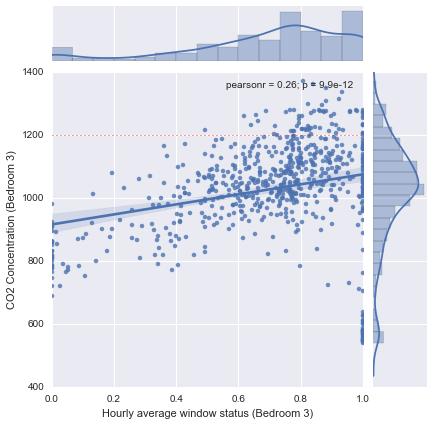

In [73]:
sns.jointplot(x="avg_wc_br1_br3", y="avg_co2_br1_br3", kind = 'reg', data=data)
plt.xlabel('Hourly average window status (Bedroom 3)')
plt.ylabel('CO2 Concentration (Bedroom 3)')
plt.axhline(y=1200, linestyle = 'dotted',linewidth=0.8, c = 'r')
plt.xlim(0,1)
plt.ylim(400,1400)

(0, 3)

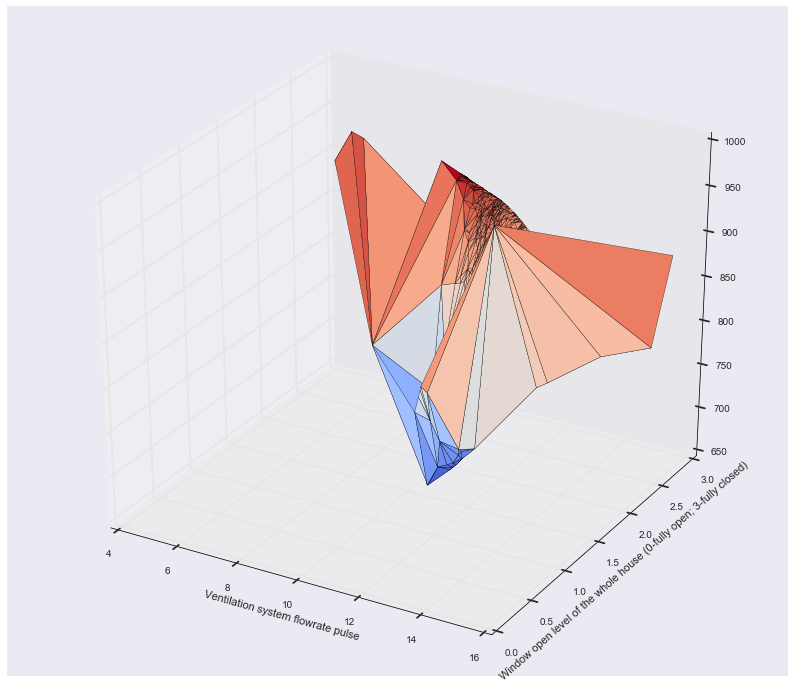

In [123]:
import scipy.optimize as opt

doex = data.set_point_ventilation_unit
doey = data.avg_wc_all
doez = data.avg_co2_all
data_reg = np.vstack((doex,doey))

def regfun(data_reg,a,b,c,d,e,f,g,h):
    x,y = data_reg
    return a*x**3+b*x**2*y+c*x*y**2+d*y**3+e*x*y+f*x+g*y+h

zdata = doez
popt, pcov = opt.curve_fit(regfun,data_reg,zdata,maxfev=100000)
cmap = plt.cm.coolwarm
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(doex, doey,regfun(data_reg, *popt),cmap = cmap)
ax.set_xlabel('Ventilation system flowrate pulse')
ax.set_ylabel('Window open level of the whole house (0-fully open; 3-fully closed)')
ax.set_ylim(0,3)

(0, 3)

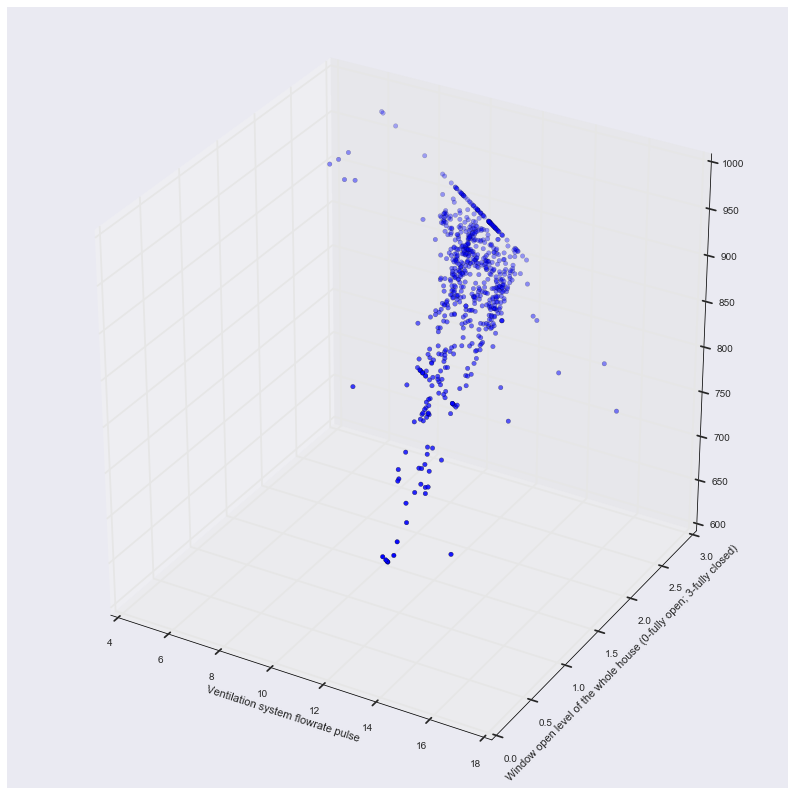

In [137]:
doex = data.set_point_ventilation_unit
doey = data.avg_wc_all
doez = data.avg_co2_all
data_reg = np.vstack((doex,doey))

def regfun(data_reg,a,b,c):
    x,y = data_reg
    return  a*x+b*y+c

zdata = doez
popt, pcov = opt.curve_fit(regfun,data_reg,zdata,maxfev=100000)


fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
cmap = plt.cm.coolwarm
X, Y = np.meshgrid(doex, doey)
zs = np.array([regfun(data_reg, *popt) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.scatter3D(doex, doey,regfun(data_reg, *popt),cmap = cmap)
ax.set_xlabel('Ventilation system flowrate pulse')
ax.set_ylabel('Window open level of the whole house (0-fully open; 3-fully closed)')
ax.set_ylim(0,3)

(0, 3)

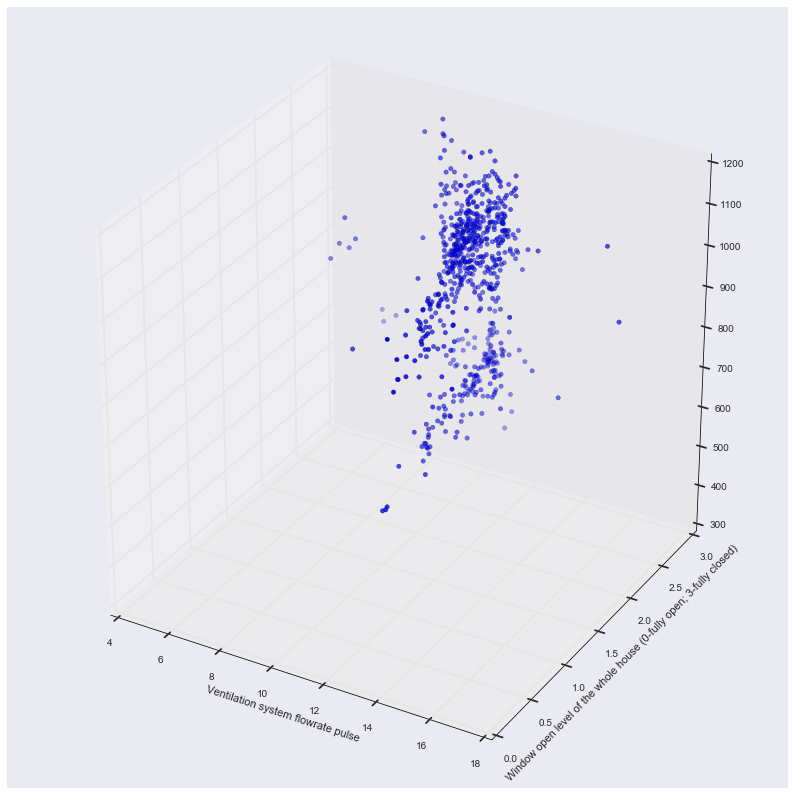

In [132]:
doex = data.set_point_ventilation_unit
doey = data.avg_wc_all
doez = data.avg_co2_all

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
cmap_hot = plt.get_cmap("hot")
ax.scatter(doex, doey,doez,cmap = cmap_hot)
ax.set_xlabel('Ventilation system flowrate pulse')
ax.set_ylabel('Window open level of the whole house (0-fully open; 3-fully closed)')
ax.set_ylim(0,3)

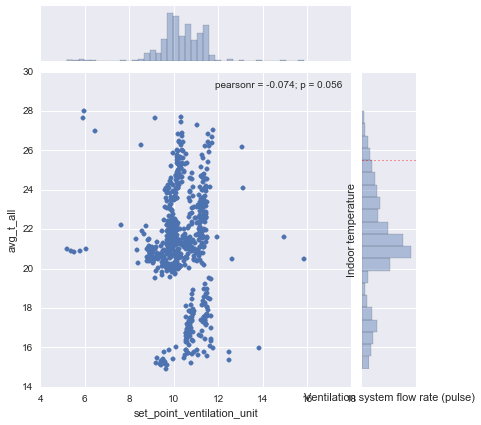

In [94]:
sns.jointplot(x="set_point_ventilation_unit", y="avg_t_all", kind = 'scatter', data=data)
plt.xlabel('Ventilation system flow rate (pulse)')
plt.ylabel('Indoor temperature')
plt.axhline(y=25.5, linestyle = 'dotted',linewidth=0.8, c = 'r')

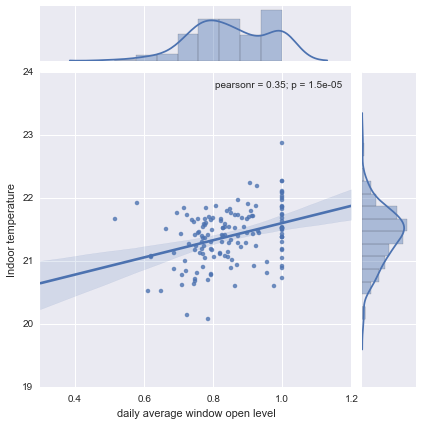

In [98]:
sns.jointplot(x="avg_wc_br1_br3", y="avg_t_br1_br3", kind = 'reg', data=data_Winter)
plt.xlabel('daily average window open level')
plt.ylabel('Indoor temperature')

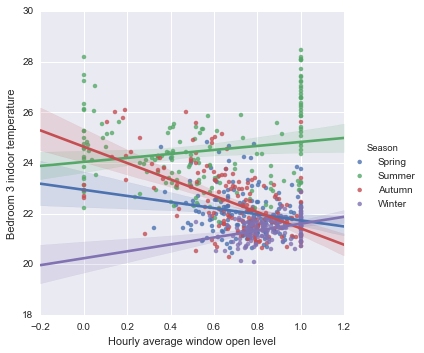

In [100]:
sns.lmplot(x="avg_wc_br1_br3", y="avg_t_br1_br3", hue = "Season", data = data_seasons)
plt.xlabel('Hourly average window open level')
plt.ylabel('Bedroom 3 indoor temperature')

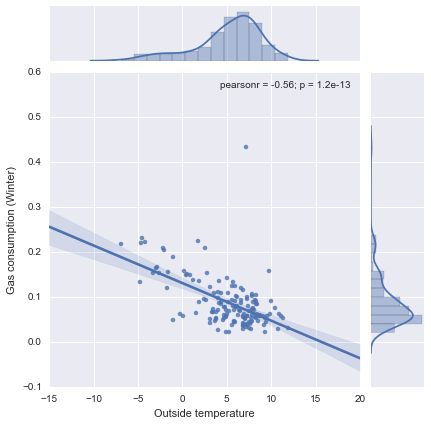

In [107]:
sns.jointplot(x="avg_t", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Outside temperature')
plt.ylabel('Gas consumption (Winter)')

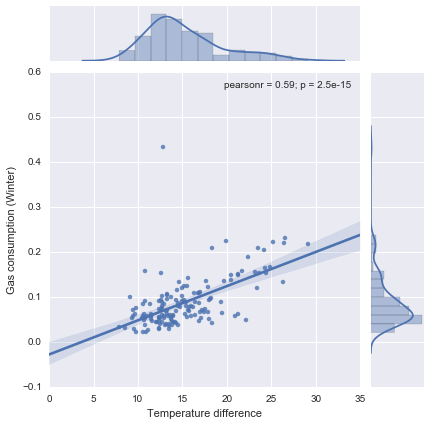

In [108]:
sns.jointplot(x="avg_t_diff", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Temperature difference')
plt.ylabel('Gas consumption (Winter)')

(2.5, 3)

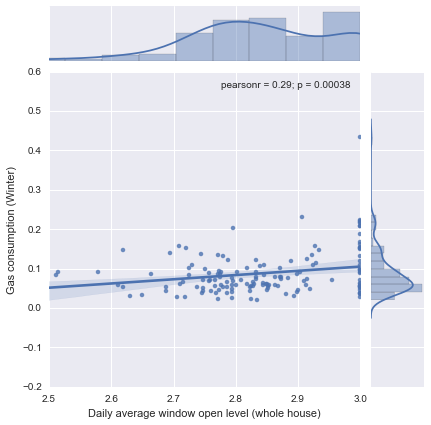

In [109]:
sns.jointplot(x="avg_wc_all", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Daily average window open level (whole house)')
plt.ylabel('Gas consumption (Winter)')
plt.xlim(2.5,3)

(8, 12)

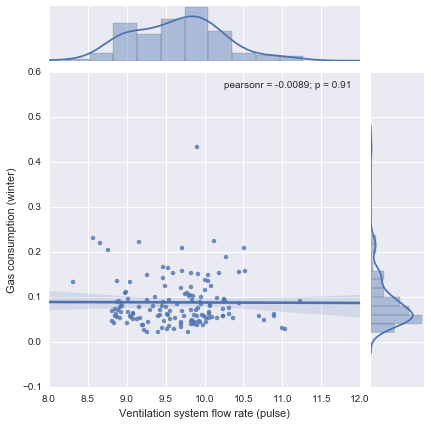

In [115]:
sns.jointplot(x="set_point_ventilation_unit", y="gc", kind = 'reg', data=data_Winter)
plt.xlabel('Ventilation system flow rate (pulse)')
plt.ylabel('Gas consumption (winter)')
plt.xlim(8,12)

In [118]:
data_temp = data_Winter[(data['avg_t'] >= 5) & (data['avg_t'] <=8)]
data_temp = data_temp.reset_index()